## Treatments and Adherence 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

In [74]:
ls /share/scratch/projects/cvd_gbd/cvd_re/simulation_science/

2012_missing_meds.csv           med_list_2014.xlsx
archive/                        meps_consolidated_filepaths.csv
ccs_multi_dx_tool_2015.csv*     meps_med_names_combos_all_yrs.xlsx
ccs_multi_pr_tool_2015.csv*     meps_medicine_filepaths.csv
ddpos_lifestyle_fpg_hba1c.csv*  nhanes/
drug_efficacy_ldl.csv           nhanes_sbp_tx_info.csv
drug_efficacy_sbp.csv           pdc_meps_2014.csv
drug_efficacy_sbp_new.csv       stroke_CSMR_data/
hf_props_2021_08_18.csv         tx_percent_initialize.csv
initial_percents_egan.xlsx*


In [77]:
df = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/nhanes_sbp_tx_info.csv')
df

,Unnamed: 0,sex_id,age_group_id,sbpcat10,mean,standard_error,design_effect,sample_size,nclust,nstrata,var
0,1,1,10,"[100,110)",0.001423,0.001440,0.431659,297,3,115,treatment
1,2,1,10,"[110,120)",0.005590,0.002944,1.049311,674,3,134,treatment
2,3,1,10,"[120,130)",0.025429,0.007903,1.230002,489,3,132,treatment
3,4,1,10,"[130,140)",0.019414,0.014680,2.275280,202,3,102,treatment
...,...,...,...,...,...,...,...,...,...,...,...
351,352,2,9,"[140,150)",0.122344,0.166936,1.557195,7,2,7,treatment
352,353,2,9,"[70,80)",0.000000,0.000000,NaN,2,2,2,treatment
353,354,2,9,"[80,90)",0.000000,0.000000,NaN,36,2,30,treatment
354,355,2,9,"[90,100)",0.000000,0.000000,NaN,316,3,120,treatment


In [2]:
sbp_adh = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/pdc_meps_2014.csv')
sbp_adh

,Unnamed: 0,sex_id,agecat,mean,standard_error,design_effect,sample_size,nclust,nstrata,var,age_start,age_end
0,1,1,3,0.434373,0.068298,2.532441,10,3,7,max.adherence,18,24
1,2,1,4,0.659626,0.024392,2.024428,296,3,113,max.adherence,25,44
2,3,1,5,0.733359,0.010134,1.873111,1520,3,164,max.adherence,45,64
3,4,1,6,0.815432,0.012725,3.365763,1312,3,161,max.adherence,65,85
4,5,2,3,0.805225,0.168822,1.754808,7,2,7,max.adherence,18,24
5,6,2,4,0.663173,0.026154,2.613899,336,3,117,max.adherence,25,44
6,7,2,5,0.727124,0.010074,2.189242,1766,3,163,max.adherence,45,64
7,8,2,6,0.808625,0.010021,2.743875,1809,3,165,max.adherence,65,85


In [3]:
sbp_eff = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/drug_efficacy_sbp.csv')
sbp_eff

,name,half_dose_efficacy_mean_mean,half_dose_efficacy_mean_lb,half_dose_efficacy_mean_ub,half_dose_efficacy_sd_mean,half_dose_efficacy_sd_sd,standard_dose_efficacy_mean_mean,standard_dose_efficacy_mean_lb,standard_dose_efficacy_mean_ub,standard_dose_efficacy_sd_mean,...,double_dose_efficacy_sd_sd,half_dose_side_effects_mean,half_dose_side_effects_lb,half_dose_side_effects_ub,standard_dose_side_effects_mean,standard_dose_side_effects_lb,standard_dose_side_effects_ub,double_dose_side_effects_mean,double_dose_side_effects_lb,double_dose_side_effects_ub
0,thiazide_type_diuretics,7.4,6.6,8.2,0.281,0,8.8,8.3,9.4,0.281,...,0,2.0,-2.2,6.3,9.9,6.6,13.2,17.8,11.5,24.2
1,beta_blockers,7.4,6.6,8.3,0.332,0,9.2,8.6,9.9,0.332,...,0,5.5,0.3,10.7,7.5,4.0,10.9,9.4,3.6,15.2
2,ace_inhibitors,6.9,6.1,7.8,0.281,0,8.5,7.9,9.0,0.281,...,0,3.9,-3.7,11.6,3.9,-0.5,8.3,3.9,-0.2,8.0
3,angiotensin_ii_blockers,7.8,7.1,8.6,0.230,0,10.3,9.9,10.8,0.230,...,0,-1.8,-10.2,6.5,0.0,-5.4,5.4,1.9,-5.6,9.3
4,calcium_channel_blockers,5.9,5.2,6.6,0.200,0,8.8,8.3,9.2,0.200,...,0,1.6,-3.5,6.7,8.3,4.8,11.7,14.9,9.8,20.1


In [7]:
sbp_eff_data={'sbp':['175+','175-165','165-155','155-145','145-135','135-125','<=125'],'one_drug_half_dose_efficacy':[9.0,8.3,7.5,6.7,5.9,5.1,4.4],'one_drug_std_dose_efficacy':[11.7,10.7,9.7,8.7,7.7,6.7,5.7],'two_drug_half_dose_efficacy':[18.0,16.4,14.5,13.3,11.7,10.2,8.6],'two_drug_std_dose_efficacy':[22.2,20.3,18.4,16.5,14.6,12.7,10.8],'three_drug_half_dose_efficacy':[26.9,24.6,22.2,19.9,17.6,15.2,12.9],'three_drug_std_dose_efficacy':[31.7,29.0,26.3,23.6,20.9,18.2,15.5]}
sbp_eff_new=pd.DataFrame(sbp_eff_data)
sbp_eff_new.to_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/drug_efficacy_sbp_new.csv')

In [8]:
sbp_eff_new

,sbp,one_drug_half_dose_efficacy,one_drug_std_dose_efficacy,two_drug_half_dose_efficacy,two_drug_std_dose_efficacy,three_drug_half_dose_efficacy,three_drug_std_dose_efficacy
0,175+,9.0,11.7,18.0,22.2,26.9,31.7
1,175-165,8.3,10.7,16.4,20.3,24.6,29.0
2,165-155,7.5,9.7,14.5,18.4,22.2,26.3
3,155-145,6.7,8.7,13.3,16.5,19.9,23.6
4,145-135,5.9,7.7,11.7,14.6,17.6,20.9
5,135-125,5.1,6.7,10.2,12.7,15.2,18.2
6,<=125,4.4,5.7,8.6,10.8,12.9,15.5


In [9]:
ldl_eff_data={'medication_category':['low_intensity','medium_intensity','low_med_with_eze','high_intensity','high_with_eze'],'efficacy':[24.67,36.2,46.1,51.25,61.15],'lower_bound':[22.4,33.6,43.5,47.14,57.04],'upper_bound':[27.19,39.1,49.00,55.68,65.58]}
ldl_eff=pd.DataFrame(ldl_eff_data)
ldl_eff.to_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/drug_efficacy_ldl.csv')

In [10]:
ldl_eff

,medication_category,efficacy,lower_bound,upper_bound
0,low_intensity,24.67,22.40,27.19
1,medium_intensity,36.20,33.60,39.10
2,low_med_with_eze,46.10,43.50,49.00
3,high_intensity,51.25,47.14,55.68
4,high_with_eze,61.15,57.04,65.58


In [4]:
sbp_base = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/tx_percent_initialize.csv')
sbp_base.head(15)

,Unnamed: 0,type,drug_class,initial_percent
0,1,mono,ace,0.298190
1,2,mono,bblocker,0.227902
2,3,mono,diuretic,0.218317
3,4,mono,ccb,0.178914
...,...,...,...,...
10,11,combo,ccb_diuretic,0.151473
11,12,combo,bblocker_ccb,0.086957
12,13,combo,bblocker_arb,0.043478
13,14,combo,ace_arb,0.008415


In [86]:
init_sbp = pd.read_excel('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/initial_percents_egan.xlsx')
init_sbp

,type,drug_class,raw_percent,scaled_percent
0,mono,ace,0.280,NaN
1,mono,bblocker,0.214,NaN
2,mono,diuretic,0.205,NaN
3,mono,ccb,0.168,NaN
...,...,...,...,...
12,combo,bblocker_ccb,0.062,NaN
13,combo,bblocker_arb,0.031,NaN
14,combo,arb_ccb,0.008,NaN
15,combo,ace_arb,0.006,NaN


In [88]:
outpatient_visits = HealthcareEntity(name='outpatient_visits', kind='healthcare_entity', gbd_id=me_id(19797), utilization=me_id(19797),)

NameError: name 'HealthcareEntity' is not defined

## Mystery CSMR Datasets

In [6]:
ls /share/scratch/projects/cvd_gbd/cvd_re/simulation_science/stroke_CSMR_data/

GBD2019_acute_intracerebral_csmr_2021-05-20.csv
GBD2019_acute_ischemic_csmr_2021-05-20.csv
GBD2019_acute_subarachnoid_csmr_2021-05-20.csv
GBD2019_chronic_intracerebral_csmr_2021-05-20.csv
GBD2019_chronic_ischemic_csmr_2021-05-20.csv
GBD2019_chronic_subarachnoid_csmr_2021-05-20.csv


In [73]:
csmr_acute.bundle_name.unique()

array(['First ever acute ischemic stroke with CSMR  - EMR Comparison'],
      dtype=object)

In [37]:
csmr_acute = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/stroke_CSMR_data/GBD2019_acute_ischemic_csmr_2021-05-20.csv')
csmr_acute_2017_alabama = csmr_acute.loc[(csmr_acute['year_end']==2017) & (csmr_acute['location_name']=='Alabama')].reset_index()
csmr_acute_2017_alabama['age_group'] = [f'{int(i)}_to_{int(j)}' for (i,j) in zip(csmr_acute_2017_alabama.age_start,csmr_acute_2017_alabama.age_end)]
csmr_acute_2017_alabama.head()

,index,location_name,location_id,sex,year_start,year_end,age_start,age_end,measure,mean,lower,upper,bundle_id,bundle_name,nid,field_citation_value,seq,age_group
0,336,Alabama,523,Female,2017,2017,15,19,mtspecific,6.050097e-07,4.570067e-07,7.846416e-07,7112,First ever acute ischemic stroke with CSMR - ...,238131,Institute for Health Metrics and Evaluation (I...,598454923,15_to_19
1,676,Alabama,523,Male,2017,2017,15,19,mtspecific,6.058812e-07,4.224927e-07,8.272798e-07,7112,First ever acute ischemic stroke with CSMR - ...,238131,Institute for Health Metrics and Evaluation (I...,598464393,15_to_19
2,1082,Alabama,523,Male,2017,2017,20,24,mtspecific,1.127587e-06,8.057988e-07,1.538528e-06,7112,First ever acute ischemic stroke with CSMR - ...,238131,Institute for Health Metrics and Evaluation (I...,598474613,20_to_24
3,1089,Alabama,523,Female,2017,2017,20,24,mtspecific,1.072170e-06,7.926435e-07,1.412118e-06,7112,First ever acute ischemic stroke with CSMR - ...,238131,Institute for Health Metrics and Evaluation (I...,598474620,20_to_24
4,1655,Alabama,523,Male,2017,2017,25,29,mtspecific,1.758683e-06,1.162682e-06,2.485175e-06,7112,First ever acute ischemic stroke with CSMR - ...,238131,Institute for Health Metrics and Evaluation (I...,598483184,25_to_29


In [36]:
csmr_chronic = pd.read_csv('/share/scratch/projects/cvd_gbd/cvd_re/simulation_science/stroke_CSMR_data/GBD2019_chronic_ischemic_csmr_2021-05-20.csv')
csmr_chronic_2017_alabama = csmr_chronic.loc[(csmr_chronic['year_end']==2017) & (csmr_chronic['location_name']=='Alabama')].reset_index()
csmr_chronic_2017_alabama['age_group'] = [f'{int(i)}_to_{int(j)}' for (i,j) in zip(csmr_chronic_2017_alabama.age_start,csmr_chronic_2017_alabama.age_end)]
csmr_chronic_2017_alabama.head()

,index,location_name,location_id,sex,year_start,year_end,age_start,age_end,measure,mean,lower,upper,bundle_id,bundle_name,nid,field_citation_value,seq,age_group
0,180,Alabama,523,Female,2017,2017,15,19,mtspecific,1.977073e-08,5.494734e-09,4.855632e-08,786,Chronic ischemic stroke with CSMR,238131,Institute for Health Metrics and Evaluation (I...,603554,15_to_19
1,400,Alabama,523,Male,2017,2017,15,19,mtspecific,1.868984e-08,5.481684e-09,3.829279e-08,786,Chronic ischemic stroke with CSMR,238131,Institute for Health Metrics and Evaluation (I...,608747,15_to_19
2,622,Alabama,523,Male,2017,2017,20,24,mtspecific,1.341630e-07,4.596412e-08,2.590086e-07,786,Chronic ischemic stroke with CSMR,238131,Institute for Health Metrics and Evaluation (I...,614806,20_to_24
3,626,Alabama,523,Female,2017,2017,20,24,mtspecific,1.488585e-07,5.636284e-08,3.081825e-07,786,Chronic ischemic stroke with CSMR,238131,Institute for Health Metrics and Evaluation (I...,614810,20_to_24
4,1054,Alabama,523,Male,2017,2017,25,29,mtspecific,3.473435e-07,1.115630e-07,7.545207e-07,786,Chronic ischemic stroke with CSMR,238131,Institute for Health Metrics and Evaluation (I...,621160,25_to_29


In [47]:
groupby_cols = ['age_group', 'sex', 'location_name']
csmr_stroke_all = csmr_acute_2017_alabama.groupby(groupby_cols).sum() + csmr_chronic_2017_alabama.groupby(groupby_cols).sum()
csmr_stroke_all.head()

index  location_id  year_start  year_end  \
age_group sex    location_name                                             
15_to_19  Female Alabama          516         1046        4034      4034   
          Male   Alabama         1076         1046        4034      4034   
20_to_24  Female Alabama         1715         1046        4034      4034   
          Male   Alabama         1704         1046        4034      4034   
25_to_29  Female Alabama         3231         1046        4034      4034   

                                age_start  age_end          mean  \
age_group sex    location_name                                     
15_to_19  Female Alabama               30       38  6.247804e-07   
          Male   Alabama               30       38  6.245710e-07   
20_to_24  Female Alabama               40       48  1.221029e-06   
          Male   Alabama               40       48  1.261750e-06   
25_to_29  Female Alabama               50       58  1.962096e-06   

                                       lower         upper  bundle_id     nid  \
age_group sex    location_name                                                  
15_to_19  Female Alabama        4.625014e-07  8.331979e-07       7898  476262   
          Male   Alabama        4.279743e-07  8.655726e-07       7898  476262   
20_to_24  Female Alabama        8.490063e-07  1.720300e-06       7898  476262   
          Male   Alabama        8.517629e-07  1.797536e-06       7898  476262   
25_to_29  Female Alabama        1.258500e-06  2.883943e-06       7898  476262   

                                      seq  
age_group sex    location_name             
15_to_19  Female Alabama        599058477  
          Male   Alabama        599073140  
20_to_24  Female Alabama        599089430  
          Male   Alabama        599089419  
25_to_29  Female Alabama        599114357

### Compare Against GBD 

In [40]:
from db_queries import get_outputs as go
from db_queries import get_ids

In [41]:
gbd_csmr = go("cause", gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=495, measure_id=1, metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])
gbd_csmr['age'] = gbd_csmr.age_group_name.str.replace(' ', '_')
gbd_csmr.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,location_type,measure_name,metric_name,sex,val,upper,lower,age
0,10,495,523,1,3,1,2017,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Deaths,Rate,Male,0.000003,0.000004,0.000002,25_to_29
1,10,495,523,1,3,2,2017,cvd_stroke_isch,25 to 29,Ischemic stroke,False,Alabama,admin1,Deaths,Rate,Female,0.000003,0.000004,0.000002,25_to_29
2,11,495,523,1,3,1,2017,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Deaths,Rate,Male,0.000006,0.000009,0.000003,30_to_34
3,11,495,523,1,3,2,2017,cvd_stroke_isch,30 to 34,Ischemic stroke,False,Alabama,admin1,Deaths,Rate,Female,0.000006,0.000009,0.000004,30_to_34
4,12,495,523,1,3,1,2017,cvd_stroke_isch,35 to 39,Ischemic stroke,False,Alabama,admin1,Deaths,Rate,Male,0.000009,0.000014,0.000005,35_to_39


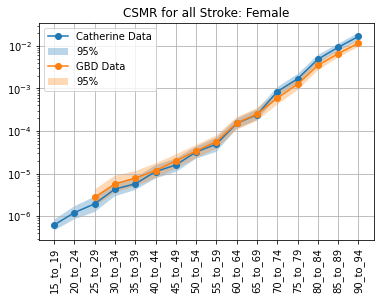

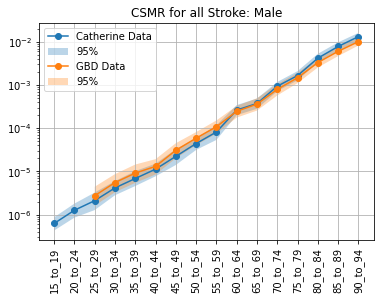

In [53]:
for sex in csmr_stroke_all.index.get_level_values('sex').unique():
    plt.figure() 
    subdata4 = csmr_stroke_all.loc[(csmr_stroke_all.index.get_level_values('sex')==sex)]
    plt.plot(subdata4.index.get_level_values('age_group'), subdata4['mean'], marker='o')
    plt.fill_between(subdata4.index.get_level_values('age_group'), subdata4['lower'], subdata4['upper'], alpha=.3)
    subdata3 = gbd_csmr.loc[(gbd_csmr.sex==sex)]
    plt.plot(subdata3['age'], subdata3['val'], marker='o')
    plt.fill_between(subdata3['age'], subdata3['lower'], subdata3['upper'], alpha=.3)
    plt.title(f'CSMR for all Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.yscale('log')
    plt.grid()
    plt.yscale('log')
    plt.legend(['Catherine Data', '95%', 'GBD Data', '95%']) 

### Acute Compare Against Output 

In [56]:
sim_results_dir = '/mnt/share/costeffectiveness/results/vivarium_nih_us_cvd/model_1/nih_us_cvd/v2_myocardial_infarction/alabama/2022_08_16_12_11_07/count_data/'
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_stroke_acute_ischemic_stroke", "ischemic_stroke_chronic_ischemic_stroke", "ischemic_stroke_susceptible_to_ischemic_stroke"])].reset_index() 
person_time = person_time.rename(columns = {'value':'ptvalue'})
per_time_group = person_time.groupby(['age', 'sex', 'year', 'input_draw']).ptvalue.sum().reset_index()

In [58]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')
death_rate_cause = deaths.groupby(['age', 'sex', 'year', 'input_draw', 'cause']).value.sum().reset_index()
acute_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_ischemic_stroke')].reset_index()
acute_rate_2 = pd.concat([acute_rate, per_time_group.ptvalue], axis=1)
acute_rate_2['mean_rate'] = acute_rate_2['value'] / acute_rate_2['ptvalue']
acute_rate_summary = (acute_rate_2
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
acute_rate_summary.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000002,0.0,0.000038
1,25_to_29,male,0.000004,0.0,0.000039
2,30_to_34,female,0.000003,0.0,0.000037
3,30_to_34,male,0.000005,0.0,0.000037
4,35_to_39,female,0.000007,0.0,0.000038


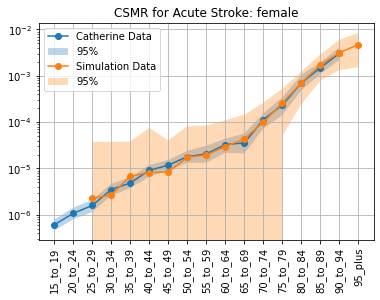

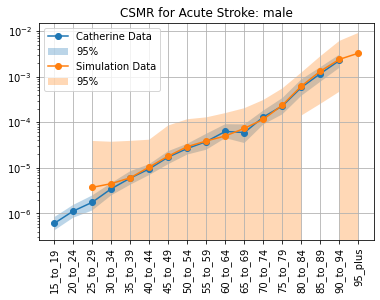

In [66]:
for sex in acute_rate_summary.sex.unique():
    plt.figure() 
    subdata3 = csmr_acute_2017_alabama.loc[(csmr_acute_2017_alabama.sex==sex.capitalize())]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['lower'], subdata3['upper'], alpha=.3)
    subdata4 = acute_rate_summary.loc[(acute_rate_summary.sex==sex)]
    plt.plot(subdata4['age'], subdata4['mean'], marker='o')
    plt.fill_between(subdata4['age'], subdata4['2.5%'], subdata4['97.5%'], alpha=.3)
    plt.title(f'CSMR for Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Catherine Data', '95%', 'Simulation Data', '95%']) 

### Chronic Compare Against Output 

In [70]:
chronic_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate = pd.concat([chronic_rate, per_time_group.ptvalue], axis=1)
chronic_rate['mean_rate'] = chronic_rate['value'] / chronic_rate['ptvalue']
chronic_rate_summ = (chronic_rate
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_summ.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000000e+00,0.0,0.000000
1,25_to_29,male,0.000000e+00,0.0,0.000000
2,30_to_34,female,1.995375e-07,0.0,0.000000
3,30_to_34,male,4.127435e-07,0.0,0.000000
4,35_to_39,female,1.037728e-06,0.0,0.000019


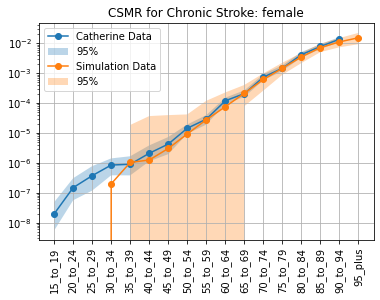

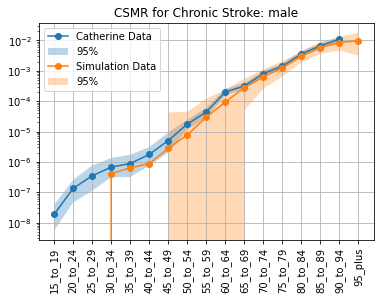

In [71]:
for sex in chronic_rate_summ.sex.unique():
    plt.figure() 
    subdata3 = csmr_chronic_2017_alabama.loc[(csmr_chronic_2017_alabama.sex==sex.capitalize())]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['lower'], subdata3['upper'], alpha=.3)
    subdata4 = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex)]
    plt.plot(subdata4['age'], subdata4['mean'], marker='o')
    plt.fill_between(subdata4['age'], subdata4['2.5%'], subdata4['97.5%'], alpha=.3)
    plt.title(f'CSMR for Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Catherine Data', '95%', 'Simulation Data', '95%']) 